## Black Friday Sales Prediction

### Import Necessary Libraries

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm #OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

#### Import data

In [17]:
train_df = pd.read_csv('train.csv')

test_df = pd.read_csv('test.csv')

sample_df = pd.read_csv('sample_submission.csv')

### EDA

In [18]:
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [19]:
test_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [20]:
sample_df.head()

,Purchase,User_ID,Product_ID
0,100,1000004,P00128942
1,100,1000009,P00113442
2,100,1000010,P00288442
3,100,1000010,P00145342
4,100,1000011,P00053842


In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


observations Product_Category_2 has 376430 rows and Product_Category_3 has 166821 rows in 550068 total no. of rows

In [22]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


observations Product_Category_2 has 161255 rows and Product_Category_3 has 71037 rows in 233599 total no. of rows

In [24]:
train_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [75]:
#Concatenating train and test data
train_df ['Source'] = 'train'

test_df ['Source'] = 'test'

df = pd.concat([train_df, test_df])

In [26]:
#Checking for shape after concatenation
df.shape

(783667, 13)

In [76]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
Source                             0
dtype: int64

In [28]:
#No. of Unique values in User_Id
df.User_ID.nunique()

5891

In [29]:
#No of Unique values in Product_ID
df.Product_ID.nunique()

3677

In [30]:
df.Product_ID.value_counts()

P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
             ... 
P00013542       1
P00350742       1
P00065542       1
P00309042       1
P00203242       1
Name: Product_ID, Length: 3677, dtype: int64

In [31]:
df.duplicated().sum()

0

In [32]:
df[df.Product_ID == 'P00085442']

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Source
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
322,1000053,P00085442,M,26-35,0,B,1,0,12,14.0,NaN,1752.0,train
973,1000169,P00085442,M,26-35,7,B,3,0,12,14.0,NaN,1434.0,train
2024,1000323,P00085442,M,46-50,12,C,1,0,12,14.0,NaN,1714.0,train
11978,1001796,P00085442,M,51-55,11,C,2,1,12,14.0,NaN,1423.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
226847,1001587,P00085442,F,26-35,3,B,3,0,12,14.0,NaN,NaN,test
229759,1000035,P00085442,M,46-50,1,C,4+,1,12,14.0,NaN,NaN,test
230357,1001051,P00085442,F,26-35,0,A,0,1,12,14.0,NaN,NaN,test
232668,1004579,P00085442,F,18-25,4,B,1,1,12,14.0,NaN,NaN,test


Observation : Product_Category_1, Product_Category_2 and Product_Category_3 unique for each Product_ID

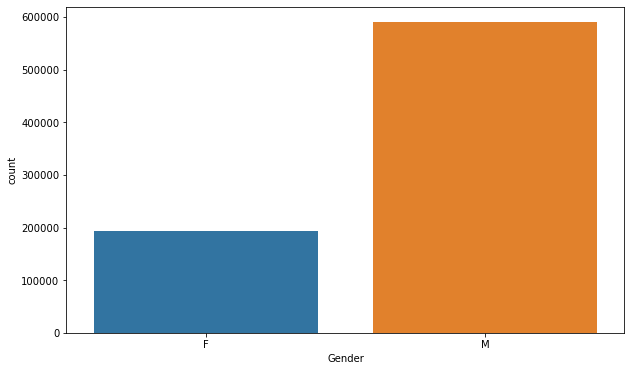

In [40]:
plt.figure(figsize = (10,6))
sns.countplot(df.Gender);
#More customers are Male

<AxesSubplot:title={'center':'Gender Based Total Purchase'}, xlabel='Gender', ylabel='Total Purchase'>

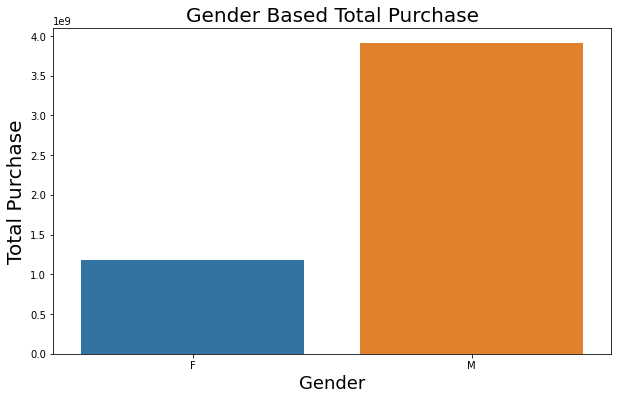

In [41]:
#Male Purchases more compared to female
plt.figure(figsize=(10,6))
plt.xlabel('Gender', fontsize = 18)
plt.ylabel('Total Purchase', fontsize = 20)
plt.title('Gender Based Total Purchase', fontsize = 20)
sns.barplot(x = df.Gender.unique(), y = df.groupby('Gender').Purchase.sum().to_list())

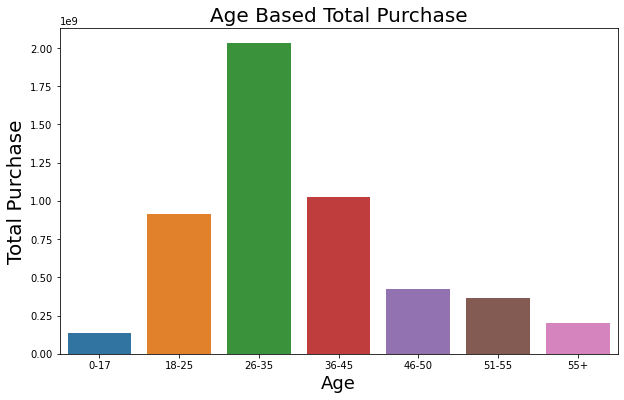

In [44]:
#26-35 Age group people purchases more compared to other age group
plt.figure(figsize = (10,6))
plt.xlabel('Age Group', fontsize = 18)
plt.ylabel('Total Purchase', fontsize = 20)
plt.title('Age Based Total Purchase', fontsize = 20)
sns.barplot(x = df.groupby('Age').Purchase.sum().index, y = df.groupby('Age').Purchase.sum().to_list());

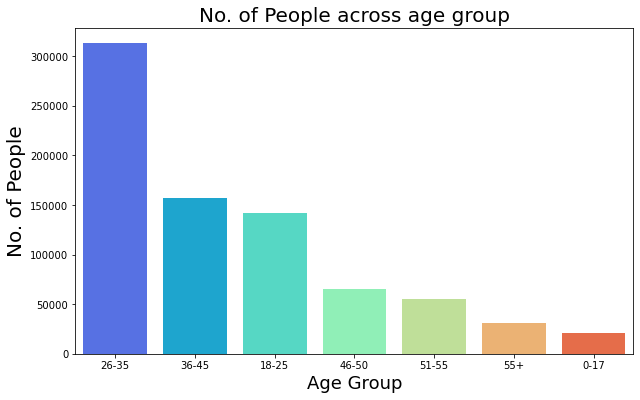

In [45]:
plt.figure(figsize = (10,6))
plt.xlabel('Age Group', fontsize = 18)
plt.ylabel('No. of People', fontsize = 20)
plt.title('No. of People across age group', fontsize = 20)
sns.barplot(x = df.Age.value_counts().keys(), y = df.Age.value_counts().values, palette='rainbow');

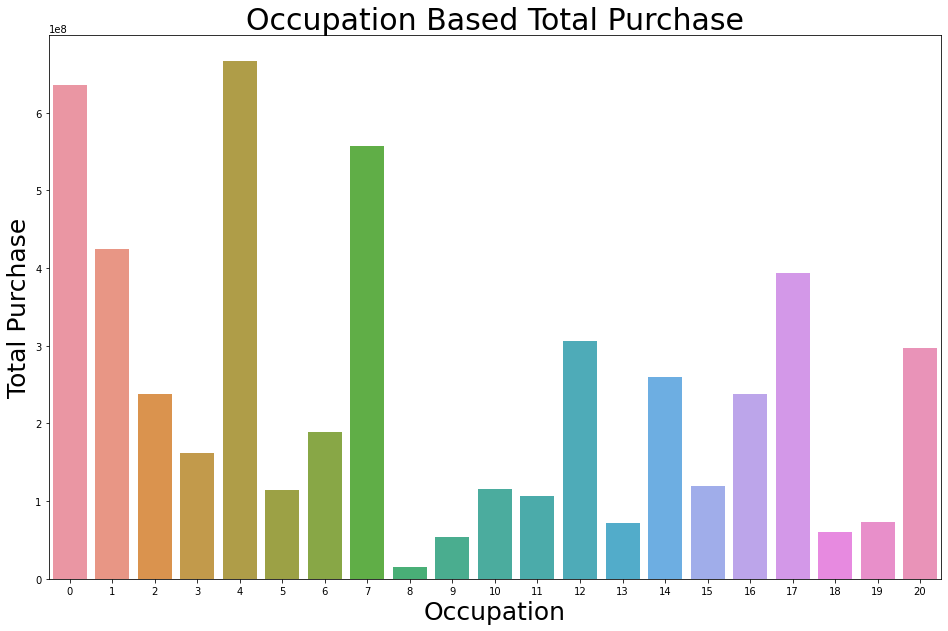

In [46]:
plt.figure(figsize = (16,10))
plt.xlabel('Occupation', fontsize = 25)
plt.ylabel('Total Purchase', fontsize = 25)
plt.title('Occupation Based Total Purchase', fontsize = 30)
sns.barplot(x = list(range(21)), y = df.groupby('Occupation').Purchase.sum().to_list());

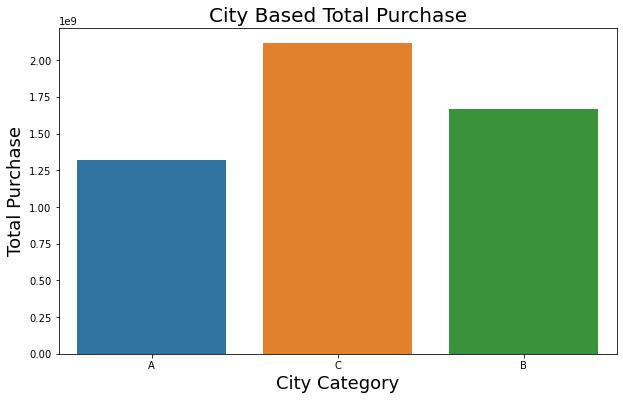

In [47]:
plt.figure(figsize = (10,6))
plt.xlabel('City Category', fontsize = 18)
plt.ylabel('Total Purchase', fontsize = 18)
plt.title('City Based Total Purchase', fontsize = 20)
sns.barplot(x = df.City_Category.unique(), y = df.groupby('City_Category').Purchase.sum().to_list());

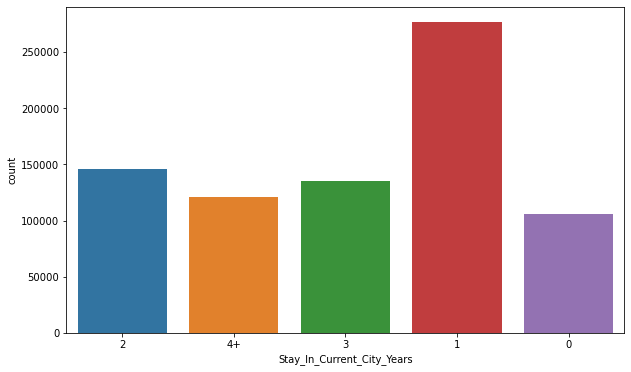

In [48]:
plt.figure(figsize = (10,6))
sns.countplot(df['Stay_In_Current_City_Years']);
#People Living for 1 year city purchasing more

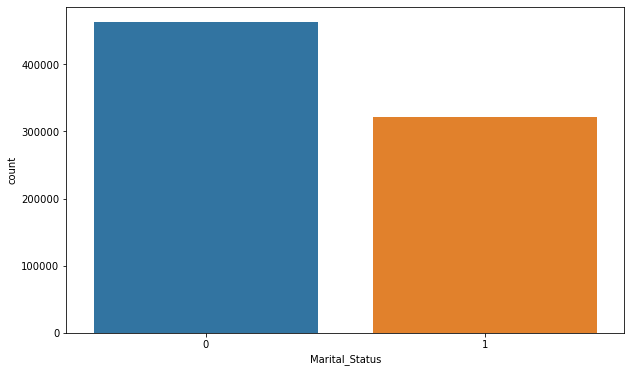

In [50]:
plt.figure(figsize = (10,6))
sns.countplot(df['Marital_Status']);
#More of the purchases are done by unmarried customers

In [57]:
null_ID = df.loc[:,['Product_ID','Product_Category_2']] 
#Since Null values are same based on the Product_ID bringing out Product ID

null_prod_id_list = list(set(null_ID[null_ID['Product_Category_2'].isna()]['Product_ID']))

len(null_prod_id_list) # 1860 Product_ID's Product_Category_2 has null values

1860

In [69]:
#Unique values in Product Category 2
unique_Prod_2 = (df.Product_Category_2.unique())[1:]

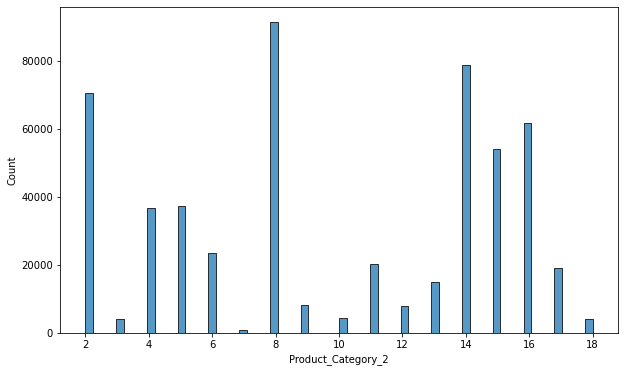

In [80]:
#Before filling nan values
plt.figure(figsize=(10,6))
sns.histplot(df['Product_Category_2']);
#Distribution of Product_Category_2

In [81]:
#Replacing Null values by randomly chosen unique values
ran = unique_Prod_2
for i in null_prod_id_list:
    j = np.random.choice(unique_Prod_2)
    df.loc[df['Product_ID']==i, 'Product_Category_2'] = j
print('Done')   

Done


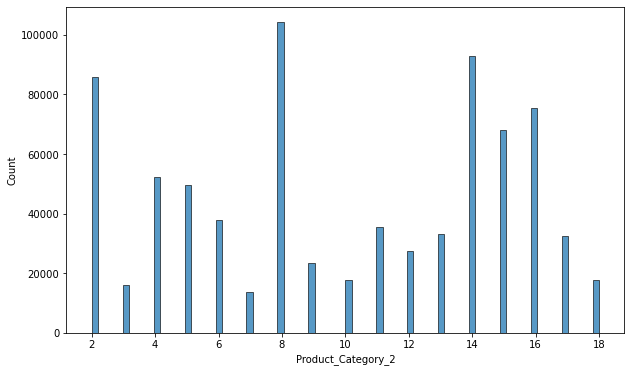

In [82]:
#After filling nan values
plt.figure(figsize=(10,6))
sns.histplot(df['Product_Category_2']);
#Distribution of Product_Category_2

In [85]:
null_ID_3 = df.loc[:,['Product_ID','Product_Category_3']] 
#Since Null values are same based on the Product_ID bringing out Product ID

null_prod_id_list_3 = list(set(null_ID_3[null_ID_3['Product_Category_3'].isna()]['Product_ID']))

len(null_prod_id_list_3) # 3148 Product_ID's Product_Category_3 has null values

3148

In [87]:
#Unique values in Product Category 2
unique_Prod_3 = (df.Product_Category_3.unique())[1:]

unique_Prod_3

array([14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3., 18.,
       11., 10.])

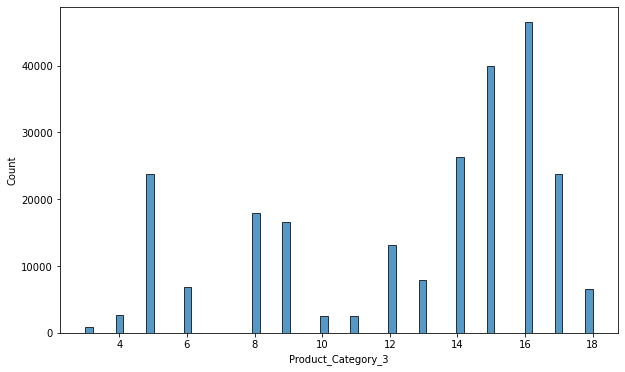

In [88]:
#Before filling nan values
plt.figure(figsize=(10,6))
sns.histplot(df['Product_Category_3']);
#Distribution of Product_Category_3

In [89]:
#Replacing Null values by randomly chosen unique values
ran = unique_Prod_3
for i in null_prod_id_list_3:
    j = np.random.choice(unique_Prod_3)
    df.loc[df['Product_ID']==i, 'Product_Category_3'] = j
print('Done')   

Done


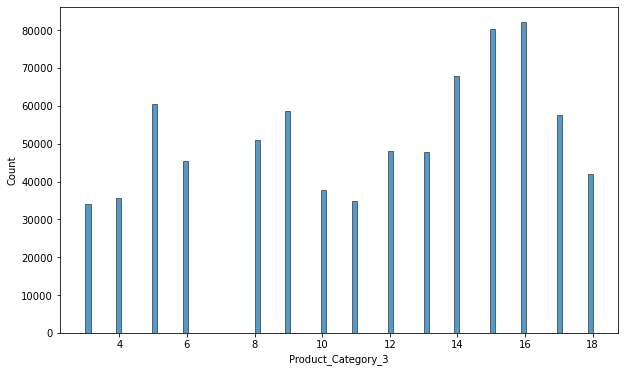

In [90]:
#After filling nan values
plt.figure(figsize=(10,6))
sns.histplot(df['Product_Category_3']);
#Distribution of Product_Category_3

In [91]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.921830,11.380757,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.005594,4.543465,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,8.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,10.000000,12.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,15.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [92]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
Source                             0
dtype: int64

In [93]:
#Preprocessing
df.Occupation = df.Occupation.apply(lambda x : str(x))
#Changing all variable to encode to object type

df.Marital_Status =  df.Marital_Status.apply(lambda x : str(x))

df.Product_Category_1 = df.Product_Category_1.apply(lambda x : str(x))

df.Product_Category_2 = df.Product_Category_2.apply(lambda x : str(x))

df.Product_Category_3 = df.Product_Category_3.apply(lambda x : str(x))

df_number_columns = df.select_dtypes(include=np.number).columns


df_category_columns = df.select_dtypes(exclude=np.number).columns


data_to_encode = df[df_category_columns].drop(['Product_ID', 'Source'], axis = 1)


data_to_encode

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,F,0-17,10,A,2,0,3,13.0,18.0
1,F,0-17,10,A,2,0,1,6.0,14.0
2,F,0-17,10,A,2,0,12,5.0,17.0
3,F,0-17,10,A,2,0,12,14.0,9.0
4,M,55+,16,C,4+,0,8,14.0,13.0
...,...,...,...,...,...,...,...,...,...
233594,F,26-35,15,B,4+,1,8,18.0,12.0
233595,F,26-35,15,B,4+,1,5,8.0,12.0
233596,F,26-35,15,B,4+,1,1,5.0,12.0
233597,F,46-50,1,C,4+,0,10,16.0,18.0


In [94]:
df['Product_ID'] = df.Product_ID.apply(lambda x : int(x.replace('P00','')))
#Removing 'POO' from product id
df['User_ID'] = df.User_ID.apply(lambda x : x-1000000)
#Making user_id starting from 1

In [96]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Source
0,1,69042,F,0-17,10,A,2,0,3,13.0,18.0,8370.0,train
1,1,248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1,87842,F,0-17,10,A,2,0,12,5.0,17.0,1422.0,train
3,1,85442,F,0-17,10,A,2,0,12,14.0,9.0,1057.0,train
4,2,285442,M,55+,16,C,4+,0,8,14.0,13.0,7969.0,train


In [98]:
data_encoded = pd.get_dummies(data_to_encode)

data_encoded.shape


(783667, 92)

### Scalling

In [102]:
sc = StandardScaler()

df['Product_ID'] = sc.fit_transform(df[['Product_ID']])

df['User_ID'] = sc.fit_transform(df[['User_ID']])

In [103]:
final_df = pd.concat([df[df_number_columns], data_encoded, df[['Product_ID', 'Source']]], axis = 1)

#Spliting Train and Test data
train_data = final_df.loc[final_df['Source'] == 'train']

test_data = final_df.loc[final_df['Source'] == 'test']

In [104]:
train_data.drop(['Source'] , axis = 1, inplace = True)

test_data.drop(['Source'] , axis = 1, inplace = True)

train_X = train_data.drop(['Purchase'], axis = 1)

train_y = train_data['Purchase']

test_X = test_data.drop('Purchase', axis = 1)

### Linear Regression Model

In [106]:
lm = LinearRegression()

lm.fit(train_X, train_y)

train_pred = lm.predict(train_X)

In [107]:
print('Train MAE: ',metrics.mean_absolute_error(train_y, train_pred))

print('Train MSE: ',metrics.mean_squared_error(train_y, train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(train_y, train_pred)))

print('Train R2: ', metrics.r2_score(train_y, train_pred))

Train MAE:  2265.3890046321544
Train MSE:  8967780.55398787
Train RSME:  2994.6252777247223
Train R2:  0.6445748973268179


In [108]:
test_pred = lm.predict(test_X)

In [109]:
sample_df['Purchase'] = test_pred

In [110]:
sample_df.to_csv('Final_Pred.csv', index = False)